In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import spearmanr

In [2]:
# Read in excel sheet
all_drugs_dataframe = pd.read_excel('drugs.xlsx') # PUT DIRECTORY HERE

# remove all rows that have an empty value ANYWHERE in dataset (for us is XLogP3)
all_drugs_dataframe = all_drugs_dataframe.replace(r'^\s+$', np.nan, regex=True).dropna(how='all')
all_drugs_dataframe = all_drugs_dataframe.dropna()

# convert to list since lists are more easily modified
all_drugs_list = all_drugs_dataframe.values.tolist()

# Remove ALL drug names from the dataset
refined_drugs_list = all_drugs_list
for x in refined_drugs_list:
    del x[0]

# PURELY DATA/NUMBERS, NO LABELS IN THIS. USE FOR CALCULATIONS
refined_drugs_array = np.asarray(all_drugs_list)[:,:8]
data = refined_drugs_array

# LD50 array that is the same size as the refined_drugs_array and are in order, directly corresponds to each element
LD50_vec = np.asarray(all_drugs_list)[:,8]


# REMOVE EXTREME OUTLIER THAT APPEARS TO THROW OFF DATA, ~ 4000 molecular weight

LD50_vec= np.delete(LD50_vec, obj = 31, axis = 0)
#print(refined_drugs_array[31:32,0]) # for debugging/checking which variable is cut out
refined_drugs_array = np.delete(refined_drugs_array, obj = 31, axis = 0) 
#print(refined_drugs_array[28:34,0]) # for debugging/checking which variable is cut out


<BarContainer object of 8 artists>

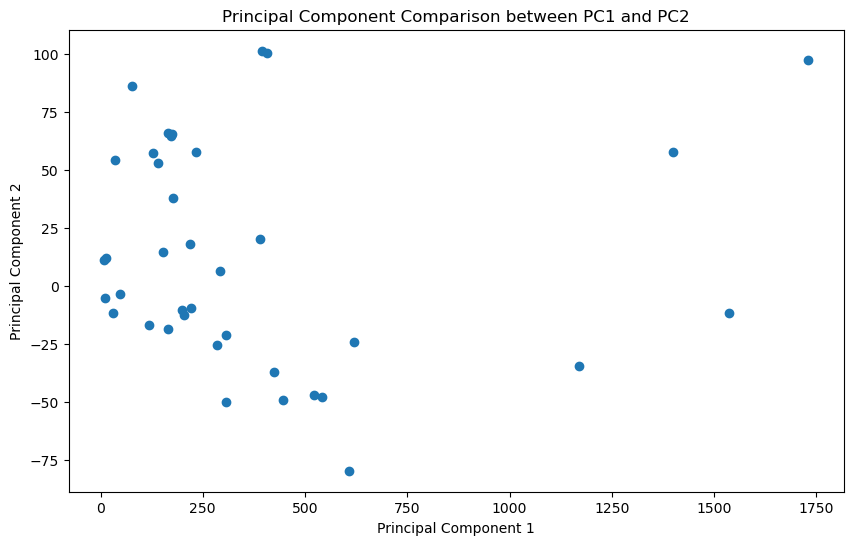

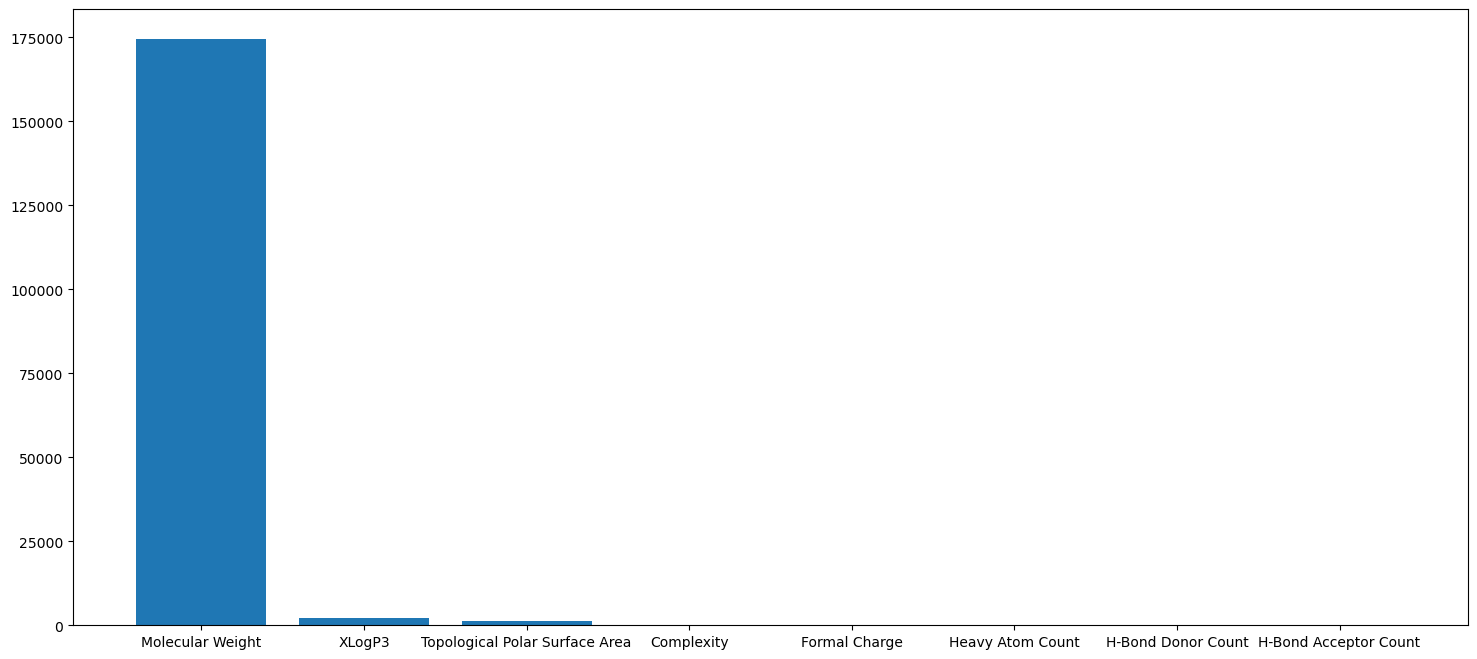

In [3]:
# Code for Principal Component Analysis

data = refined_drugs_array # craete variable to use
data = data.T # transpose array, to make each row a drug characteristic and each individual drug is a column
mean = np.mean(data, axis=0) # find mean across the rows
Y = data - mean # mean center the data by subtracting the mean array from the average array

# Find coviariance matrix
C = np.cov(Y) # C is an 8 x 8 matrix, since we have 8 drug parameters/characteristics
evals, evecs = np.linalg.eig(C)
evals_unsorted = evals # store unsorted evals for later comparing against the characteristics of drugs

# Sort eigenvalues and eigenvectors from greatest to least
idx = evals.argsort()[::-1]
evals = evals[idx]
evecs = evecs[:,idx]

# reproject data by multiplying by eigenvectors
Z = evecs.T @ Y

# Plot reprojected data
plt.figure(figsize = (10,6))
plt.scatter(Z[0,:], Z[1,:])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Comparison between PC1 and PC2')


# Plotting the eigenvalues and their corresponding parameters/characteristics
names_of_cols = all_drugs_dataframe.columns.values
names_for_graph = names_of_cols[1:9]
plt.figure(figsize = (18,8))
plt.bar(names_for_graph, evals_unsorted)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   0.05707
Date:                Tue, 30 May 2023   Prob (F-statistic):              0.813
Time:                        21:04:18   Log-Likelihood:                -128.12
No. Observations:                  38   AIC:                             260.2
Df Residuals:                      36   BIC:                             263.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.6371      1.889  

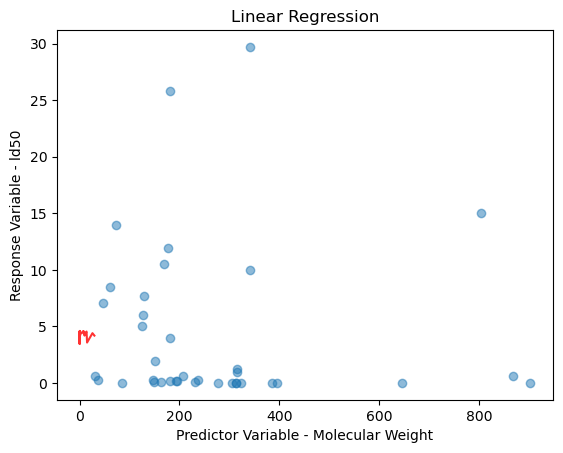

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     14.47
Date:                Tue, 30 May 2023   Prob (F-statistic):           0.000533
Time:                        21:04:18   Log-Likelihood:                -121.73
No. Observations:                  38   AIC:                             247.5
Df Residuals:                      36   BIC:                             250.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3376      1.031      5.179      0.0

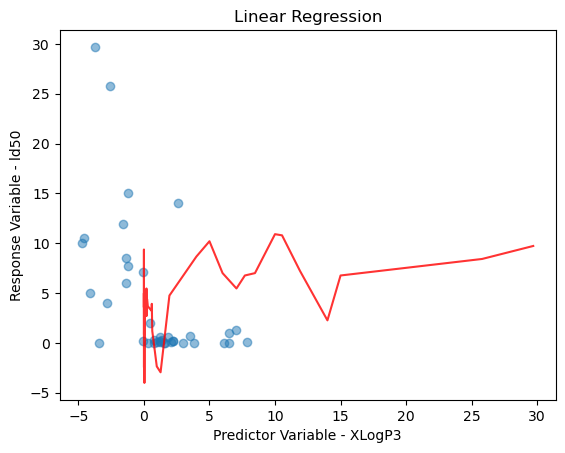

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     4.409
Date:                Tue, 30 May 2023   Prob (F-statistic):             0.0428
Time:                        21:04:18   Log-Likelihood:                -125.95
No. Observations:                  38   AIC:                             255.9
Df Residuals:                      36   BIC:                             259.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

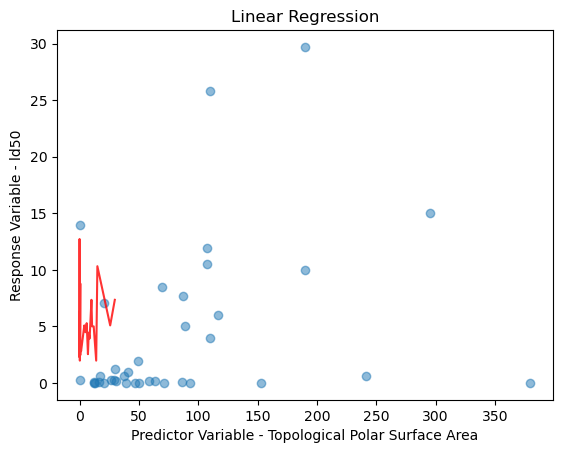

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.1841
Date:                Tue, 30 May 2023   Prob (F-statistic):              0.670
Time:                        21:04:19   Log-Likelihood:                -128.05
No. Observations:                  38   AIC:                             260.1
Df Residuals:                      36   BIC:                             263.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7085      1.535      3.068      0.0

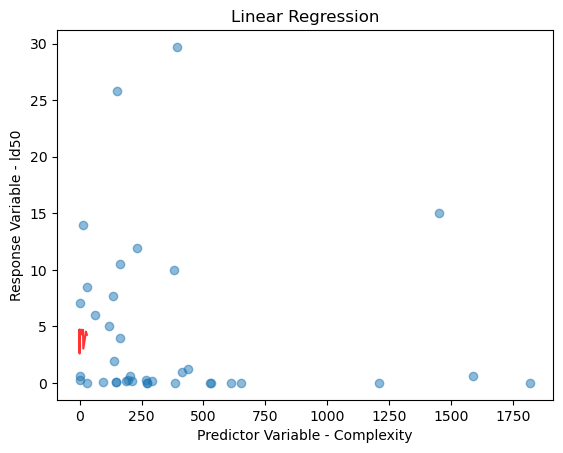

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 30 May 2023   Prob (F-statistic):                nan
Time:                        21:04:19   Log-Likelihood:                -128.15
No. Observations:                  38   AIC:                             258.3
Df Residuals:                      37   BIC:                             259.9
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.2836      1.159      3.695

/Users/laythmarabeh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


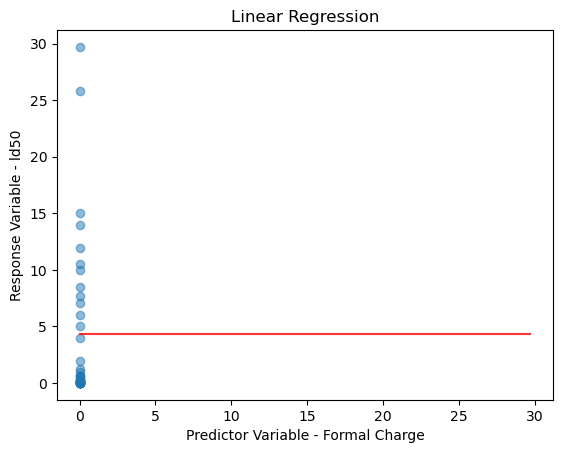

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.1260
Date:                Tue, 30 May 2023   Prob (F-statistic):              0.725
Time:                        21:04:19   Log-Likelihood:                -128.08
No. Observations:                  38   AIC:                             260.2
Df Residuals:                      36   BIC:                             263.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.7900      1.847  

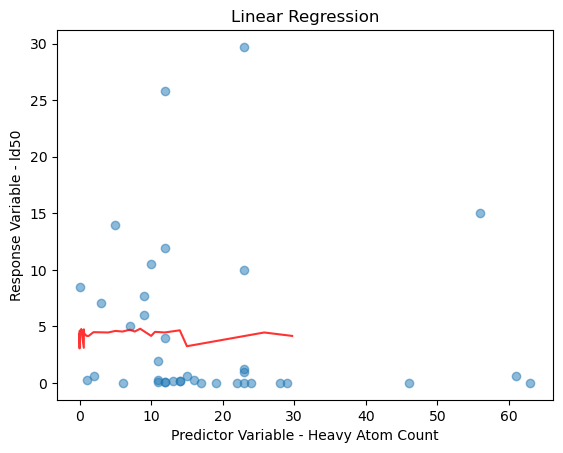

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     9.035
Date:                Tue, 30 May 2023   Prob (F-statistic):            0.00480
Time:                        21:04:19   Log-Likelihood:                -123.89
No. Observations:                  38   AIC:                             251.8
Df Residuals:                      36   BIC:                             255.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.5013      1

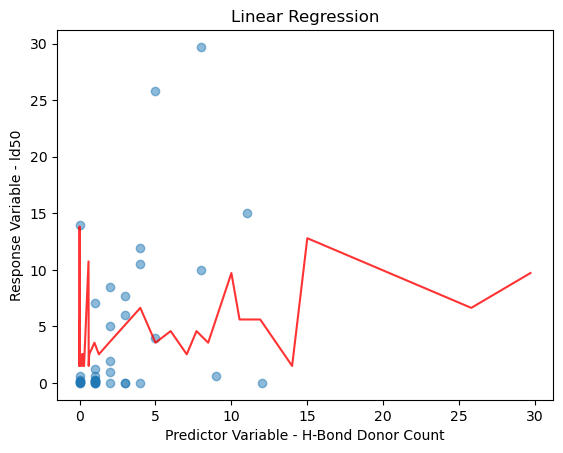

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     4.005
Date:                Tue, 30 May 2023   Prob (F-statistic):             0.0530
Time:                        21:04:19   Log-Likelihood:                -126.14
No. Observations:                  38   AIC:                             256.3
Df Residuals:                      36   BIC:                             259.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.96

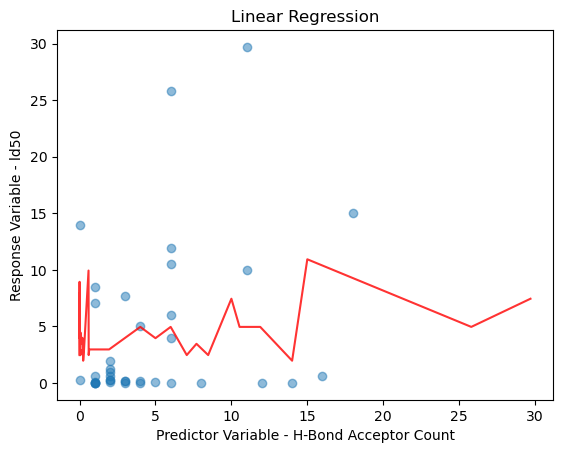

In [4]:
# Load the dataset into a Pandas DataFrame
df = pd.DataFrame(refined_drugs_array, columns = names_for_graph)

# loop through for each characteristic, -2 is for the molecule name and LD50 column names
for i in range(len(names_of_cols)-2):

    # define the variable to be looked at
    col_name = names_of_cols[i + 1]

    # Define the predictor variable (X) and the response variable (y)
    X = df[col_name]
    y = LD50_vec

    # Add a constant to the predictor variable (required by statsmodels)
    X = sm.add_constant(X)

    # Create a linear regression model
    model = sm.OLS(y, X).fit()

    # Print the summary of the model
    print(model.summary())

    plt.scatter(X[col_name], y, alpha=0.5)
    plt.plot(LD50_vec, model.predict(X), color='red', alpha=0.8)
    
    # Add axis labels and a title to the plot
    plt.xlabel(f'Predictor Variable - {col_name}')
    plt.ylabel('Response Variable - ld50')
    plt.title('Linear Regression')

    # Show the plot
    plt.show()

0
1
2


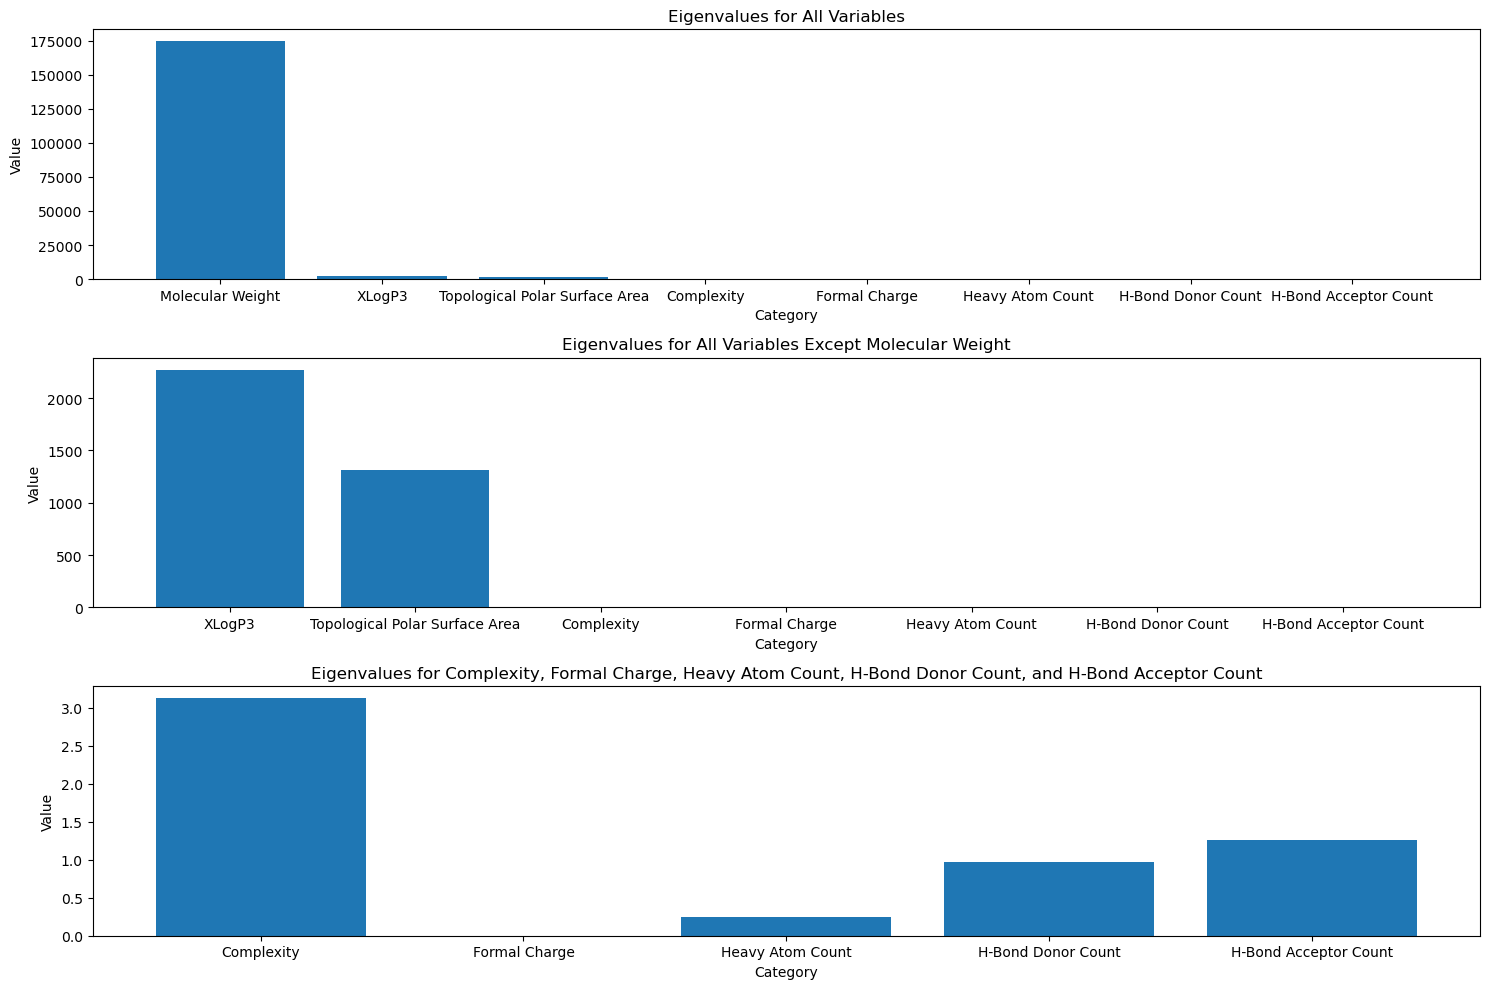

In [5]:
# Making a list of titles for figures and values that will be incorporated later into the for loop to create subplots
titles = ['Eigenvalues for All Variables','Eigenvalues for All Variables Except Molecular Weight','Eigenvalues for Complexity, Formal Charge, Heavy Atom Count, H-Bond Donor Count, and H-Bond Acceptor Count']
values = [0,1,3]
# Creating a bar chart by using eigenvalues prior to sorting 
# A for loop is done to create different subplots using different range of variables
plt.figure(figsize = (15,10))
for g, val in enumerate(values):
    print(g)
    plt.subplot(3,1,g+1)
    plt.bar(names_for_graph[val:8], evals_unsorted[val:8])
    # Add labels and title
    plt.xlabel('Category')
    plt.ylabel('Value')
    plt.title(titles[g])
    
plt.tight_layout()
plt.show()

In [6]:
# Code for Spearman correlation analysis

# Load the drug data into a pandas dataframe, 
df = pd.DataFrame(refined_drugs_array, columns = names_for_graph)

# Calculate Spearman correlation coefficients and p-values for each drug characteristic
for col in df.columns:
    corr, p_val = spearmanr(df[col], LD50_vec)
    print(f"{col} correlation with LD50: {corr:.2f} (p-value: {p_val:.2f})")

Molecular Weight correlation with LD50: -0.32 (p-value: 0.05)
XLogP3 correlation with LD50: -0.54 (p-value: 0.00)
Topological Polar Surface Area correlation with LD50: 0.29 (p-value: 0.08)
Complexity correlation with LD50: -0.34 (p-value: 0.04)
Formal Charge correlation with LD50: nan (p-value: nan)
Heavy Atom Count correlation with LD50: -0.37 (p-value: 0.02)
H-Bond Donor Count correlation with LD50: 0.38 (p-value: 0.02)
H-Bond Acceptor Count correlation with LD50: 0.14 (p-value: 0.41)


/Users/laythmarabeh/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


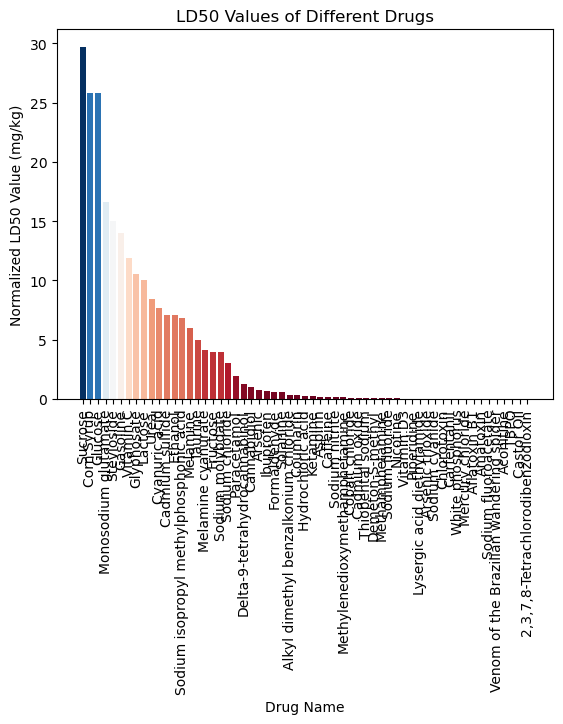

In [7]:
# Code for the LD50 Plots - Just as an intro 

# Define the data
drug_names = ['Sucrose','Corn Syrup','Glucose','Monosodium glutamate','Stevioside','Gasoline','Vitamin C','Glyphosate','Lactose','Urea','Cyanuric acid','Cadmium sulfide','Ethanol','Sodium isopropyl methylphosphonic acid','Melamine','Taurine','Melamine cyanurate','Fructose','Sodium molybdate','Sodium chloride','Paracetamol','Delta-9-tetrahydrocannabinol','Cannabidiol','Arsenic','Ibuprofen','Formaldehyde','Solanine','Alkyl dimethyl benzalkonium chloride','Coumarin','Hydrochloric acid','Ketamine','Aspirin','Caffeine','Sodium nitrite','Methylenedioxymethamphetamine','Cobalt chloride','Cadmium oxide','Thiopental sodium','Demeton-S-methyl','Methamphetamine','Sodium fluoride','Nicotine','Vitamin D3','Piperidine','Lysergic acid diethylamide','Arsenic trioxide','Sodium cyanide','Chlorotoxin','Carfentanil','White phosphorus','Mercury chloride','Aflatoxin B1','Amatoxin','Sodium fluoroacetate','Venom of the Brazilian wandering spider','Aconitine','TBPO','Castor Oil','2,3,7,8-Tetrachlorodibenzodioxin']
ld50_values = [29.7,25.8,25.8,16.6,15,14,11.9,10.537,10,8.471,7.7,7.08,7.06,6.86,6,5,4.1,4,4,3,1.944,1.27,0.98,0.763,0.636,0.6,0.59,0.3045,0.293,0.238,0.229,0.2,0.192,0.18,0.18,0.08,0.072,0.064,0.06,0.057,0.052,0.05,0.037,0.03,0.0165,0.014,0.013,0.0064,0.0043,0.00339,0.00303,0.001,0.00048,0.0007,0.00022,0.000134,0.00008,0.000036,0.000025]

# Normalize the data
ld50_values = np.array(ld50_values)
ld50_norm = (ld50_values - np.min(ld50_values)) / (np.max(ld50_values) - np.min(ld50_values))

# Create a colormap
cmap = plt.cm.get_cmap('RdBu')
colors = cmap(ld50_norm)

# Create a bar chart
plt.bar(drug_names, ld50_values, color=colors)

# Add labels and title
plt.xlabel('Drug Name')
plt.ylabel('Normalized LD50 Value (mg/kg)')
plt.title('LD50 Values of Different Drugs')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# plt.savefig('my_plot1.png')

# Show the plot
plt.show()

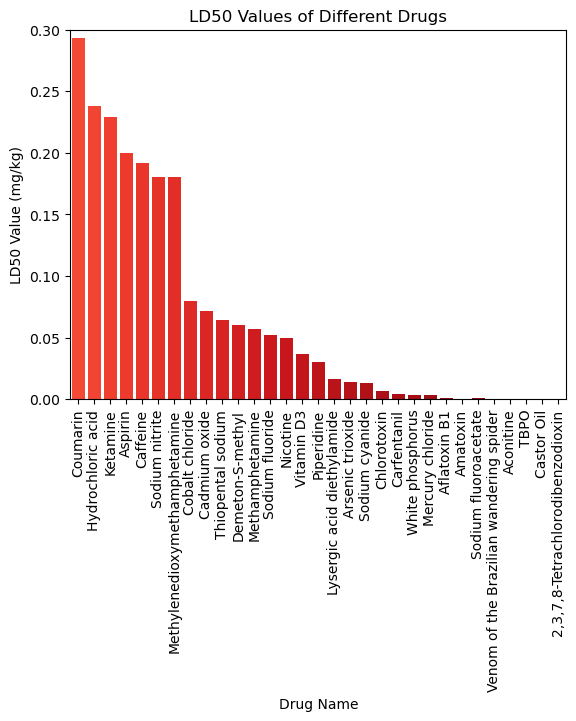

In [8]:
# Code for the LD50 Plots zoomed in on the right half of the data

# Define the data
drug_names = ['Sucrose','Corn Syrup','Glucose','Monosodium glutamate','Stevioside','Gasoline','Vitamin C','Glyphosate','Lactose','Urea','Cyanuric acid','Cadmium sulfide','Ethanol','Sodium isopropyl methylphosphonic acid','Melamine','Taurine','Melamine cyanurate','Fructose','Sodium molybdate','Sodium chloride','Paracetamol','Delta-9-tetrahydrocannabinol','Cannabidiol','Arsenic','Ibuprofen','Formaldehyde','Solanine','Alkyl dimethyl benzalkonium chloride','Coumarin','Hydrochloric acid','Ketamine','Aspirin','Caffeine','Sodium nitrite','Methylenedioxymethamphetamine','Cobalt chloride','Cadmium oxide','Thiopental sodium','Demeton-S-methyl','Methamphetamine','Sodium fluoride','Nicotine','Vitamin D3','Piperidine','Lysergic acid diethylamide','Arsenic trioxide','Sodium cyanide','Chlorotoxin','Carfentanil','White phosphorus','Mercury chloride','Aflatoxin B1','Amatoxin','Sodium fluoroacetate','Venom of the Brazilian wandering spider','Aconitine','TBPO','Castor Oil','2,3,7,8-Tetrachlorodibenzodioxin']
ld50_values = [29.7,25.8,25.8,16.6,15,14,11.9,10.537,10,8.471,7.7,7.08,7.06,6.86,6,5,4.1,4,4,3,1.944,1.27,0.98,0.763,0.636,0.6,0.59,0.3045,0.293,0.238,0.229,0.2,0.192,0.18,0.18,0.08,0.072,0.064,0.06,0.057,0.052,0.05,0.037,0.03,0.0165,0.014,0.013,0.0064,0.0043,0.00339,0.00303,0.001,0.00048,0.0007,0.00022,0.000134,0.00008,0.000036,0.000025]

# Create a bar chart
fig, ax = plt.subplots()

# Generate a list of colors that transitions from dark red to light red
color_range = plt.get_cmap('Reds')(np.linspace(0.2, 1, len(drug_names)))

# Create bars with the gradient red color
bars = ax.bar(drug_names, ld50_values, color=color_range)

# Find the index of the drug name you want to set the xlim for
drug_name = 'Coumarin'
index = drug_names.index(drug_name)

# Set figure size and font size
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 10

# Set the xlim for the corresponding x-value
ax.set_xlim(index - 0.5, len(drug_names) - 0.5)

# Add labels and title
plt.xlabel('Drug Name')
plt.ylabel('LD50 Value (mg/kg)')
plt.ylim(0,0.3)
plt.title('LD50 Values of Different Drugs')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# plt.savefig('my_plot2.png')

# Show the plot
plt.show()